<a href="https://colab.research.google.com/github/bitanb1999/HalfDayHacking/blob/main/elections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Elections

## PART 1: A Simple Election Model

Let us import data that contains a table of probabilities that PredictWise made on October 2, 2012 for the US presidential elections. PredictWise aggregated polling data and, for each state, estimated the probability that Obama or Romney would win. We import the required libraries first.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd # imports a library to handle data as dataframe

In [3]:
!wget https://raw.githubusercontent.com/bitanb1999/HalfDayHacking/main/data/predictwise.csv


--2020-12-29 15:46:20--  https://raw.githubusercontent.com/bitanb1999/HalfDayHacking/main/data/predictwise.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1365 (1.3K) [text/plain]
Saving to: ‘predictwise.csv’

predictwise.csv     100%[===================>]   1.33K  --.-KB/s    in 0s      

2020-12-29 15:46:20 (64.1 MB/s) - ‘predictwise.csv’ saved [1365/1365]



In [8]:
predictwise = pd.read_csv('predictwise.csv').set_index('States')
predictwise.head(20)

,Obama,Romney,Votes
States,,,
Alabama,0.000,1.000,9
Alaska,0.000,1.000,3
Arizona,0.062,0.938,11
Arkansas,0.000,1.000,6
California,1.000,0.000,55
Colorado,0.807,0.193,9
Connecticut,1.000,0.000,7
Delaware,1.000,0.000,3
District of Columbia,1.000,0.000,3


Each row is the probability predicted by Predictwise that Romney or Obama would win a state. The votes column lists the number of electoral college votes in that state.

In the case of tossed coins, even though we have a model which says that the probability of heads is 0.5, there are sequences of flips in which more or less than half the flips were heads. Similarly, here, if the probability of Romney winning in Arizona is 0.938, it means that if somehow, there were 1000 replications with an election each, Romney would win in 938 of those Arizonas **on the average** across the replications. And there would be some samples with Romney winning more, and some with less. We can run these **simulated** universes on a computer though not in real life.

How did these probabilities come about. It does not matter. I might have fit a deep neural network, a bayesian model, or just asked people to bet (thats what predictwise did). Its all just a model.

### Single simulation for a particular state

Let us consider the sixth state, `Colorado` and do one random simulation for this state. We use the function `np.random.uniform` to draw 1 sample from a uniform distribution of interval \[a,b) with an equal probability. The default values of a and b is \[0,1). Documentation about the function [here](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.uniform.html)

#### Uniform Distribution (in numpy)

`np.random.uniform` gives you a random number between 0 and 1, uniformly. In other words, the number is equally likely to be between 0 and 0.1, 0.1 and 0.2, and so on. This is a very intuitive idea, but it is formalized by the notion of the **Uniform Distribution**.

We then say:

$$X \sim Uniform([0,1),$$

which is to be read as **X has distribution Uniform([0,1])**. 

In [16]:
print(predictwise.loc['Colorado'])
sim = np.random.uniform()
print(sim)

Obama     0.807
Romney    0.193
Votes     9.000
Name: Colorado, dtype: float64
0.06346796265251353


Obama would would win Colorado for this particular simulation if his probability is higher than the random uniform number between 0 and 1. With and Obama probability of 0.807, Obama wins in this particular case.

In [17]:
obama_win = (predictwise.loc['Colorado'].Obama > sim)*1
print(obama_win)

1


Run this cell many times:

In [18]:
obama_win = (predictwise.loc['Colorado'].Obama > np.random.uniform())*1
print(obama_win)

1


Using `np.random.uniform` and comparing it to a probability threshold to get a 0 or 1 - this is nothing but a **Bernoulli Random Variable** for Colorado state.

A Bernoulli Random Variable is the simplest kind of random variable. It can take on two values,
1 and 0. It takes on a 1 if an experiment with probability *p* resulted in success and a 0 otherwise. A coin toss is another example of a Bernoulli Random Variable.  

What assigning the vote to Obama when the random variable **drawn** from the Uniform distribution is less than the Predictwise probability of Obama winning (which is a Bernoulli Parameter) does for us is this: lets say we have a large number of simulations and $p_{Obama}=0.8$. Now if we draw lots of numbers between 0 and 1, uniformly, then 80\% of the time, the random numbes drawn will be below 0.8. Thus we will now have many simulations with Obama either winning or losing, but winning about 80% of the time.

### Multiple simulations for a particular State

Now let's try and make 1000 simulations for Colorado. This is like making 1000 coin tosses with a biased coin. We expect Obama to win in about 80% of these

In [26]:
print(predictwise.loc['Colorado'])
sims = np.random.uniform(size=1000)
print(sims[:10])

Obama     0.807
Romney    0.193
Votes     9.000
Name: Colorado, dtype: float64
[0.94958445 0.51691936 0.80906694 0.66618089 0.78065508 0.9005826
 0.70510994 0.93614766 0.36086918 0.95775799]


With an Obama probability of about 0.8, This means that we can pick the simulations in which Obama wins Colorado by seeing in how many of the simulations the random number thrown is less than 0.8

We are simply making use of numpy broadcasting semantics here:

In [27]:
wins = sims < predictwise.loc['Colorado'].Obama
wins[:100]

array([False,  True, False,  True,  True, False,  True, False,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True, False,  True,  True, False, False,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False, False, False,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True])

This is a boolean numpy array. Summing coerces the True to 1 and False to 0 and gives us the total number of simulations.<br>

In [28]:
np.sum(wins)

799

Obama wins in 81% of the simulations, roughly, in Colorado

## Simulating the election model

To do this, 
we will assume that the outcome in each state is the result of an independent coin flip whose probability of coming up Obama is given by the Predictwise state-wise win probabilities. Lets write a function `simulate_election` that uses this **predictive model** to simulate the outcome of the election given a table of probabilities.

But first, what do we need to do to achieve this? We need to take the output of each simulation for a state and compare it to the predictiwise probability. Then we need to do this many times. Then we need to multiply in by the electoral votes in those states. And then sum over the states.

### Simulations on all states
Lets do it for all the states now. Now we make 1000 simulations for all the states. We'll create 51 rows of 1000 random numbers (1000 columns) between 0 and 1 & try and see in how many votes Obama is able to gather in each simulation

In [29]:
predictwise = pd.read_csv('predictwise.csv').set_index('States')
predictwise.head()

,Obama,Romney,Votes
States,,,
Alabama,0.000,1.000,9
Alaska,0.000,1.000,3
Arizona,0.062,0.938,11
Arkansas,0.000,1.000,6
California,1.000,0.000,55


In [34]:
sims = np.random.uniform(size=(51, 1000))
print(sims.shape)
sims

(51, 1000)


array([[0.29586064, 0.75403128, 0.21349514, ..., 0.65010569, 0.35309882,
        0.48227903],
       [0.76579996, 0.6149501 , 0.60246202, ..., 0.50883372, 0.78650687,
        0.29290111],
       [0.74109997, 0.13648712, 0.22688   , ..., 0.49886263, 0.66851596,
        0.99793537],
       ...,
       [0.0732345 , 0.69817053, 0.79023957, ..., 0.69141228, 0.65511026,
        0.98322816],
       [0.14440805, 0.83949816, 0.24036209, ..., 0.03755247, 0.9632324 ,
        0.76872705],
       [0.98759147, 0.66728747, 0.6435619 , ..., 0.54532291, 0.72081252,
        0.75114507]])

Now we just need to compare each row of 1000 random numbers with the probability for that state to find how many of the simulations Obama wins:

In [33]:

sims < predictwise.Obama.values

ValueError: ignored

Doing this creates an error as the shape of **sims** and **predictwise.Obama.values** is not the same. We can use numpy.reshape to change the shape of our array

## Comparing simulations and numpy.reshape

Reshape gives a new shape to the array without changing the data.  Detailed documentation about reshape [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html). Let us take an example to show how reshape works

In [ ]:
a= np.arange(6)
print(a)
print(a.shape)

[0 1 2 3 4 5]
(6,)


In [ ]:
a.reshape(2,3)

array([[0, 1, 2],
       [3, 4, 5]])

In [ ]:
print(a.reshape(-1,1))   # -1 as a parameter simply means that it is an unknown dimension and we want numpy to figure it out.
print('New shape is: ', a.reshape(-1,1).shape)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]
New shape is:  (6, 1)


If we use `reshape` now to our predictwise Obama proababilities, we get 51 rows of 100 Trues and Falses

In [36]:
how_many_won = sims < predictwise.Obama.values.reshape(-1,1) # reshape for broadcasting
how_many_won

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [ True,  True,  True, ...,  True, False,  True],
       [False, False, False, ..., False, False, False]])

In [39]:
how_many_won.shape

(51, 1000)

Multiply by the number of electoral Votes in each state

In [40]:
how_many_electoral_votes = how_many_won*predictwise.Votes.values.reshape(-1,1)
how_many_electoral_votes

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [10, 10, 10, ..., 10,  0, 10],
       [ 0,  0,  0, ...,  0,  0,  0]])

If we sum the columns now (that is over the 50 states and DC), we get the total electoral votes in the country for Obama in each simulation

In [41]:
total_electoral_votes_per_simulation = np.sum(how_many_electoral_votes, axis=0)
total_electoral_votes_per_simulation[:20]

array([303, 294, 325, 343, 332, 319, 326, 292, 318, 332, 318, 347, 281,
       319, 355, 322, 326, 319, 301, 357])

This is what Nate Silver and other prediction people will quote you. In How many simulations does Obama win? Well there are 538 electoral votes in the US. So you need 269 to break even. Lets compare:

In [42]:
np.sum(total_electoral_votes_per_simulation >= 269)

995

Thats 993 out of 1000 simulations or a 99.3% chance!

## Refactoring the simulation code

Here then is the predictive model we are playing with in short: each column simulates a single outcome from the 50 states + DC by choosing a random number between 0 and 1. Obama wins that simulation if the random number is $<$ the win probability. If he wins that simulation, we add in the electoral votes for that state, otherwise we dont. We do this `n_sim` times and return a list of total Obama electoral votes in each simulation.

### Q1:  *Write a function that uses this **predictive model** to simulate the outcome of the election given a Dataframe of probabilities*.



In [43]:
"""
Function
--------
simulate_election

Inputs
------
model : DataFrame
    A DataFrame summarizing an election forecast. The dataframe has 51 rows -- one for each state and DC
    It has the following columns:
       Obama : Forecasted probability that Obama wins the state
       Votes : Electoral votes for the state
    The DataFrame is indexed by state (i.e., model.index is an array of state names)
    
n_sim : int
   Number of simulations to run
   
Returns
-------
results : Numpy array with n_sim elements
   Each element stores the number of electoral college votes Obama wins in each simulation.   
"""

# your code here
def simulate_election(model, n_sim):
    # specifying size(x,y) creates uniform random numbers between 0 and 1 in a 2-d matrix with x rows and y columns
    simulations = np.random.uniform(size=(51, n_sim))
    obama_votes = (simulations < model.Obama.values.reshape(-1, 1)) * model.Votes.values.reshape(-1, 1)
    #summing over rows gives the total electoral votes for each simulation
    return obama_votes.sum(axis=0)

The following code takes the necessary probabilities for the Predictwise data, and runs 10000 simulations. If you think of this in terms of our coins, think of it as having 51 biased coins, one for each state, and tossing them 10,000 times each.

We use the results to compute the number of simulations, according to this predictive model, that Obama wins the election (i.e., the probability that he receives 269 or more electoral college votes)

In [44]:
result = simulate_election(predictwise, 10000)
print(type(result))
np.sum(result >= 269)

<class 'numpy.ndarray'>


9948

There are roughly only 50 simulations in which Romney wins the election!

### Displaying the prediction

Now, lets visualize the simulation. We will build a histogram from the result of `simulate_election`. We will **normalize** the histogram by dividing the frequency of a vote tally by the number of simulations. We'll overplot the "victory threshold" of 269 votes as a vertical black line and the result (Obama winning 332 votes) as a vertical red line.

We also compute the number of votes at the 5th and 95th quantiles, which we call the spread, and display it (this is an estimate of the outcome's uncertainty). By 5th quantile we mean that if we ordered the number of votes Obama gets in each simulation in increasing order, the 5th quantile is the number below which 5\% of the simulations lie. 

We also display the probability of an Obama victory, seeing a new feature in histograms, which is "density" plotting. Here we are normalizing the total frequency of the histogram to 1, to construct our notion of a probability from a large-number frquency.   

In [47]:
def plot_simulation(simulation):
    fig, ax = plt.subplots(figsize=(12,6))
    ax.hist(simulation, bins=np.arange(200, 538, 1), 
             label='simulations', align='left', density=True)
    ax.axvline(332, 0, .5, color='r', label='Actual Outcome')
    ax.axvline(269, 0, .5, color='k', label='Victory Threshold')
    p05 = np.percentile(simulation, 5.)
    p95 = np.percentile(simulation, 95.)
    iq = int(p95 - p05)
    pwin = ((simulation >= 269).mean() * 100)
    ax.set_title("Chance of Obama Victory: %0.2f%%, Spread: %d votes" % (pwin, iq))
    ax.legend(frameon=True, loc='upper left')
    ax.set_xlabel("Obama Electoral College Votes")
    ax.set_ylabel("Probability")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

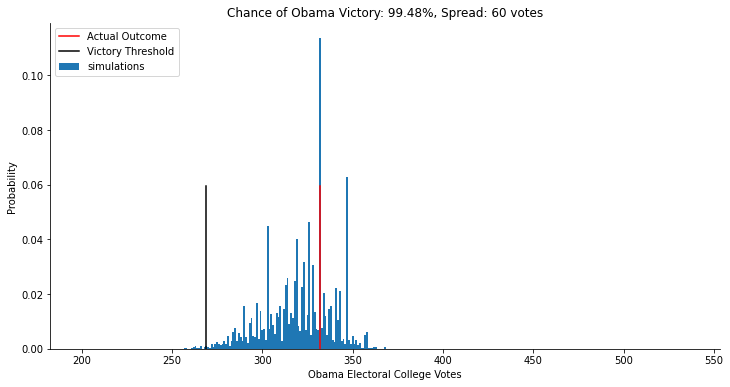

In [48]:
plot_simulation(result)

The model created by combining the probabilities we obtained from Predictwise with the simulation of a biased coin flip corresponding to the win probability in each states leads us to obtain a histogram of election outcomes. We are plotting the probabilities of a prediction, so we call this distribution over outcomes the **predictive distribution**. Simulating from our model and plotting a histogram allows us to visualize this predictive distribution. In general, such a set of probabilities is called a **probability distribution** or **probability mass function**. 

## PART 2: Estimating Probabilities

Now we will try to **estimate** our own win probabilities to plug into our predictive model.

We will start with a simple forecast model. We will try to predict the outcome of the election based the estimated proportion of people in each state who identify with one one political party or the other.

Gallup measures the political leaning of each state, based on asking random people which party they identify or affiliate with. [Here's the data](http://www.gallup.com/poll/156437/heavily-democratic-states-concentrated-east.aspx#2) they collected from January-June of 2012:

In [ ]:
gallup_2012=pd.read_csv("data/g12.csv").set_index('State')
gallup_2012["Unknown"] = 100 - gallup_2012.Democrat - gallup_2012.Republican
gallup_2012.head()

,Democrat,Republican,Dem_Adv,N,Unknown
State,,,,,
Alabama,36.0,49.6,-13.6,3197,14.4
Alaska,35.9,44.3,-8.4,402,19.8
Arizona,39.8,47.3,-7.5,4325,12.9
Arkansas,41.5,40.8,0.7,2071,17.7
California,48.3,34.6,13.7,16197,17.1


Each row lists a state, the percent of surveyed individuals who identify as Democrat/Republican, the percent whose identification is unknown or who haven't made an affiliation yet, the margin between Democrats and Republicans (`Dem_Adv`: the percentage identifying as Democrats minus the percentage identifying as Republicans), and the number `N` of people surveyed.

### QUESTION 2

This survey can be used to predict the outcome of each State's election. The simplest forecast model assigns 100% probability that the state will vote for the majority party.  *Implement this simple forecast*.

In [ ]:
"""
Function
--------
simple_gallup_model

A simple forecast that predicts an Obama (Democratic) victory with
0 or 100% probability, depending on whether a state
leans Republican or Democrat.

Inputs
------
gallup : DataFrame
    The Gallup dataframe above

Returns
-------
model : DataFrame
    A dataframe with the following column
     * Obama: probability that the state votes for Obama. All values should be 0 or 1
    model.index should be set to gallup.index (that is, it should be indexed by state name)
    
Examples
---------
>>> simple_gallup_model(gallup_2012).ix['Florida']
Obama    1
Name: Florida, dtype: float64
>>> simple_gallup_model(gallup_2012).ix['Arizona']
Obama    0
Name: Arizona, dtype: float64
"""

# your code here
def simple_gallup_model(gallup):
    return pd.DataFrame(dict(Obama=(gallup.Dem_Adv > 0).astype(float)))

Now, we run the simulation with this model, and plot it.

In [ ]:
predictwise.head()

,Obama,Romney,Votes
States,,,
Alabama,0.000,1.000,9
Alaska,0.000,1.000,3
Arizona,0.062,0.938,11
Arkansas,0.000,1.000,6
California,1.000,0.000,55


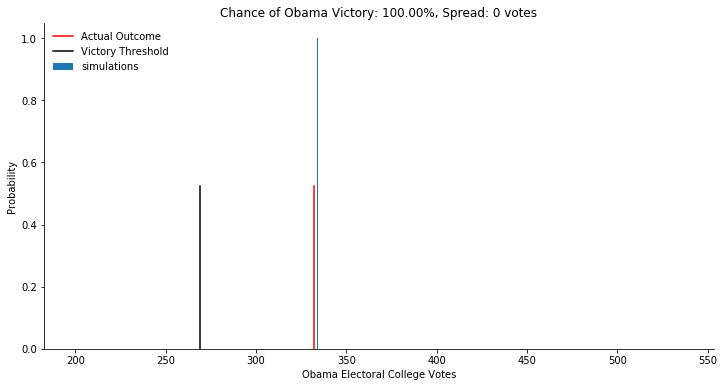

In [ ]:
model = simple_gallup_model(gallup_2012)
model = model.join(predictwise[['Votes']])
prediction = simulate_election(model, 10000)

plot_simulation(prediction)

## PART 3:  Adding Polling Uncertainty to the Predictive Model

The model above is brittle -- it includes no accounting for uncertainty, and thus makes predictions with 100% confidence. This is clearly wrong -- there are numerous sources of uncertainty in estimating election outcomes from a poll of affiliations. 

The most obvious source of error in the Gallup data is the finite sample size -- Gallup did not poll *everybody* in America, and thus the party affilitions are subject to sampling errors. How much uncertainty does this introduce?

On their [webpage](http://www.gallup.com/poll/156437/heavily-democratic-states-concentrated-east.aspx#2) discussing these data, Gallup notes that the sampling error for the states is between 3 and 6%, with it being 3% for most states. (The calculation of the sampling error itself is an exercise in statistics. Its fun to think of how you could arrive at the sampling error if it was not given to you. One way to do it would be to assume this was a two-choice situation and use binomial sampling error for the non-unknown answers, and further model the error for those who answered 'Unknown'.)

This is indeed done even in direct polls just before the election. There too you cant ask everyone and mustworry about sampling.

### QUESTION 3:

Use Gallup's estimate of 3% to build a Gallup model with some uncertainty. Assume that the `Dem_Adv` column represents the mean of a Gaussian, whose standard deviation is 3%. Build the model in the function `uncertain_gallup_model`. *Return a forecast where the probability of an Obama victory is given by the probability that a sample from the `Dem_Adv` Gaussian is positive.*

**Hint**
The probability that a sample from a Gaussian with mean $\mu$ and standard deviation $\sigma$ exceeds a threhold $z$ can be found using the the Cumulative Distribution Function of a Gaussian:

$$
CDF(z) = \frac1{2}\left(1 + {\rm erf}\left(\frac{z - \mu}{\sqrt{2 \sigma^2}}\right)\right) 
$$


In [ ]:
"""
Function
--------
uncertain_gallup_model

A forecast that predicts an Obama (Democratic) victory if the random variable drawn
from a Gaussian with mean Dem_Adv and standard deviation 3% is >0

Inputs
------
gallup : DataFrame
    The Gallup dataframe above

Returns
-------
model : DataFrame
    A dataframe with the following column
     * Obama: probability that the state votes for Obama.
    model.index should be set to gallup.index (that is, it should be indexed by state name)
"""
# your code here
from scipy.special import erf
def uncertain_gallup_model(gallup):
    sigma = 3
    prob =  .5 * (1 + erf(gallup.Dem_Adv / np.sqrt(2 * sigma**2)))
    return pd.DataFrame(dict(Obama=prob), index=gallup.index)

In [ ]:
model = uncertain_gallup_model(gallup_2012)
model = model.join(predictwise[['Votes']])

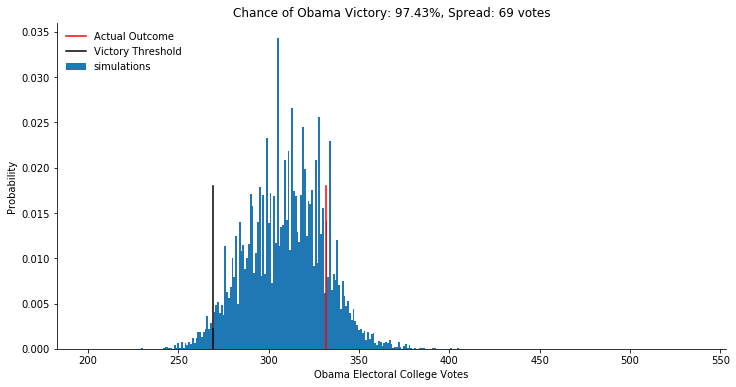

In [ ]:
prediction = simulate_election(model, 10000)
plot_simulation(prediction)